# Física Aplicada à Computação (2024-25)

### Processamento de dados adquiridos por sensores IMU relativos à postura
João Silva - 24284@stu.ipbeja.pt / Instituto Politécnico de Beja

## Descrição
Este relatório visa a documentar o processo de aquisição e processamento de dados dos sensores de giroscópio, acelerómetro, magnetómetro, pressão barométrica, temperatura e
humidade relativa do arduino nano 33 ble sense rev2. \
Para fazer o processamento dos dados foram utilizadas diversas bibliotecas de Python como por exemplo as bibliotecas "Pandas" e "Numpy", para processar altos volumes de dados e também "Matplotlib" e "Seaborn" para fazer a visualização de dados por meio de gráficos.

Este relatório visa a documentar o processo de análise dos dados recolhidos por meio dos sensores IMU do Arduino Nano 33 BLE SENSE REV2. \
Para realizar este processamento foram utilizadas as bibliotecas: 
- Pandas: Análise dos dados recolhidos.
- Numpy:  Processamento de grandes volumes de dados
- Matplotlib: Criação de gráficos complexos para uma melhor análise dos dados.
- Seaborn: Biblioteca baseada em Matplotlib e utilizada para visualização de dados.

Com esta análise pretende-se avaliar os dados armazenados em um ficheiro .csv determinando se a postura ao longo da recolha dos dados é boa ou má. 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [138]:
# Limpeza na estrutura do ficheiro
df = pd.read_csv("POSTURE.CSV")

original_col_name = [col for col in df.columns if "Status" in col][0]

df.rename(columns={original_col_name: "Status"}, inplace=True)

df["Status"] = df["Status"].str.replace(";;;", "", regex=False).str.strip()


## Análise dos dados em função do tempo

Após ser feita a recolha dos dados foi feita uma análise dos valores de "Tilt", nos eixos X e Y em função do Time.\
Utilizando o código abaixo, foi gerado um gráfico que mostra a variação dos ângulos de inclinação ao longo do tempo:

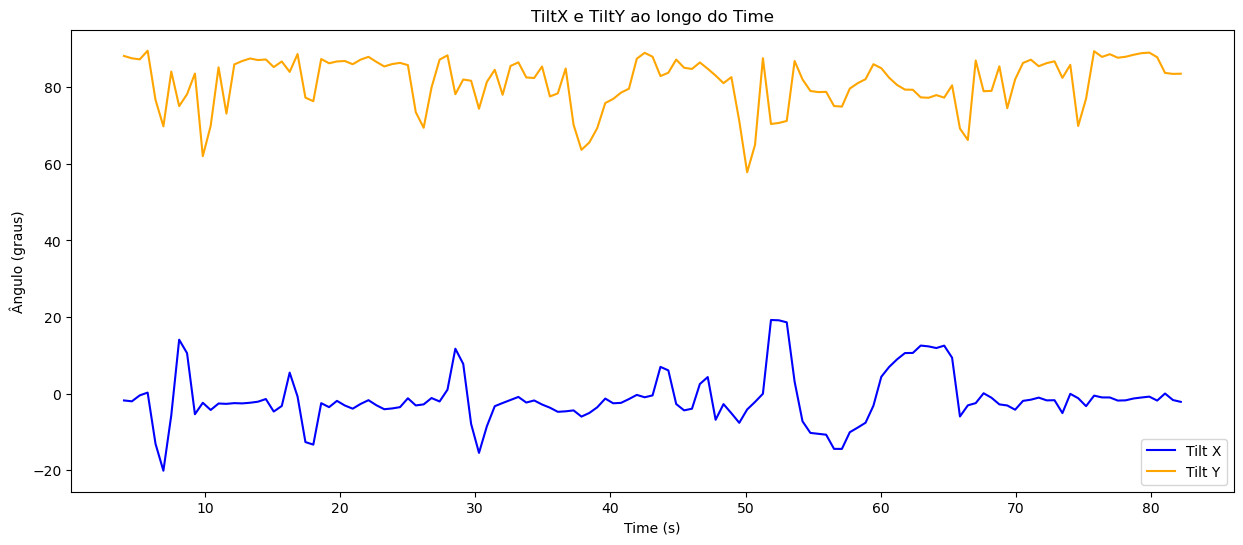

In [151]:
plt.figure(figsize=(15, 6))
plt.plot(df["Time"], df["TiltX"], label="Tilt X", color='blue')
plt.plot(df["Time"], df["TiltY"], label="Tilt Y", color='orange')
plt.legend()
plt.title("TiltX e TiltY ao longo do Time")
plt.xlabel("Time (s)")
plt.ylabel("Ângulo (graus)")
plt.show()


## Análise dos dados por limites pré-definidos

Foi feita uma análise da estabilidade do sistema ao identificar violações nos valores de inclinação (TiltX e TiltY) com base em limites pré-definidos. Através de gráficos, mostra quando os valores ultrapassam esses limites, destacando anomalias em vermelho e comportamentos normais em verde. Isso permite uma avaliação rápida e clara da estabilidade do sistema e a deteção de eventuais problemas.

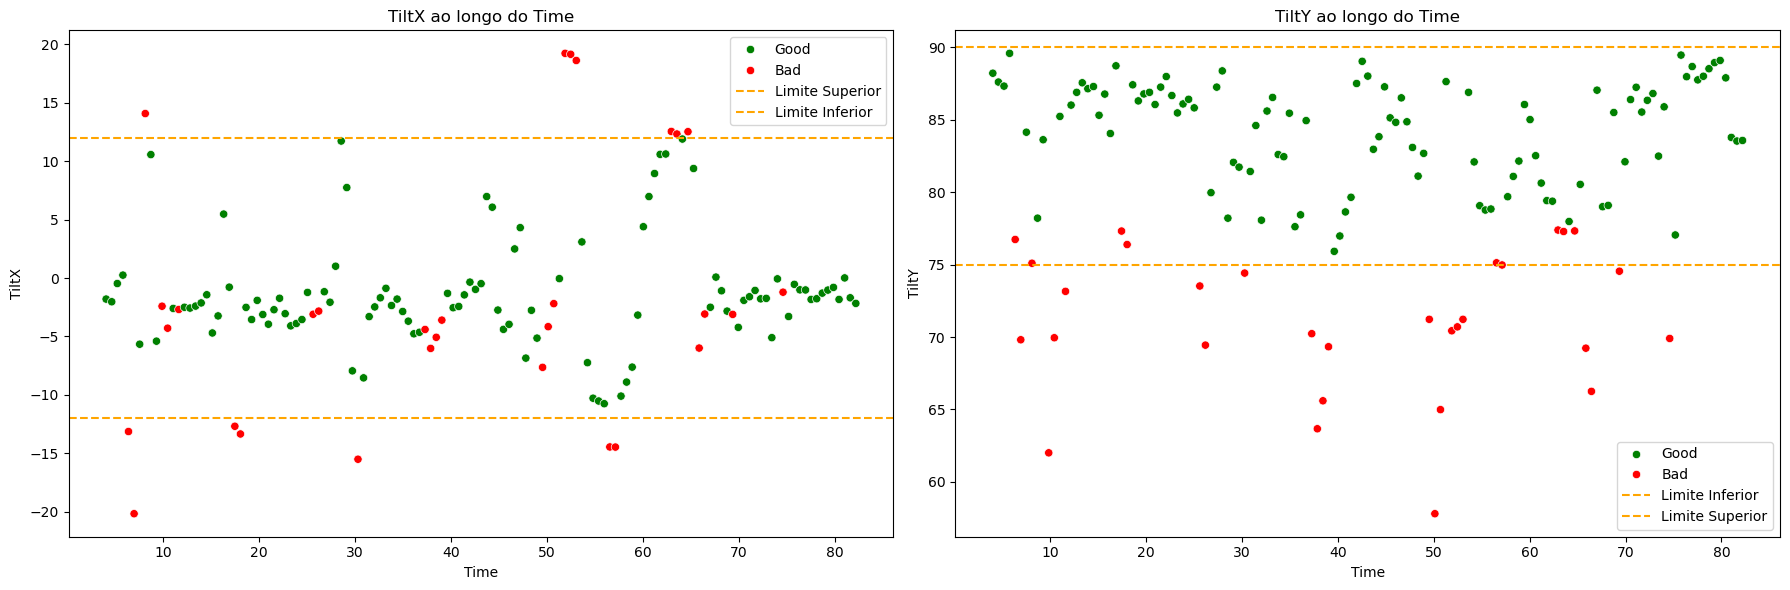

In [136]:
df["TiltX_bad"] = (df["TiltX"].abs() < -12) | (df["TiltX"].abs() > 12)
df["TiltY_bad"] = (df["TiltY"].abs() < 75) | (df["TiltY"].abs() > 90)

# Combina TiltX e TiltY para identificar violações
df["detected_status"] = df["TiltX_bad"] | df["TiltY_bad"]
df["detected_status"] = df["detected_status"].replace({True: "Bad", False: "Good"})

# Criar uma figura com dois gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=True)

# Gráfico do TiltX
sns.scatterplot(
    data=df, x="Time", y="TiltX", hue="detected_status", ax=axes[0], palette=["green", "red"]
)
axes[0].axhline(12, color='orange', linestyle='--', label="Limite Superior")
axes[0].axhline(-12, color='orange', linestyle='--', label="Limite Inferior")
axes[0].set_title("TiltX ao longo do Time")
axes[0].legend()

# Gráfico do TiltY
sns.scatterplot(
    data=df, x="Time", y="TiltY", hue="detected_status", ax=axes[1], palette=["green", "red"]
)
axes[1].axhline(75, color='orange', linestyle='--', label="Limite Inferior")
axes[1].axhline(90, color='orange', linestyle='--', label="Limite Superior")
axes[1].set_title("TiltY ao longo do Time")
axes[1].legend()

plt.tight_layout()
plt.show()


## Análise por correlação

A análise de correlação entre TiltX e TiltY verifica se há relação entre os eixos. Correlação próxima de 1 ou -1 indica dependência (aumentam juntos ou em direções opostas), enquanto 0 sugere independência. Um gráfico de dispersão visualiza essa relação, ajudando a identificar padrões ou comportamentos coordenados.

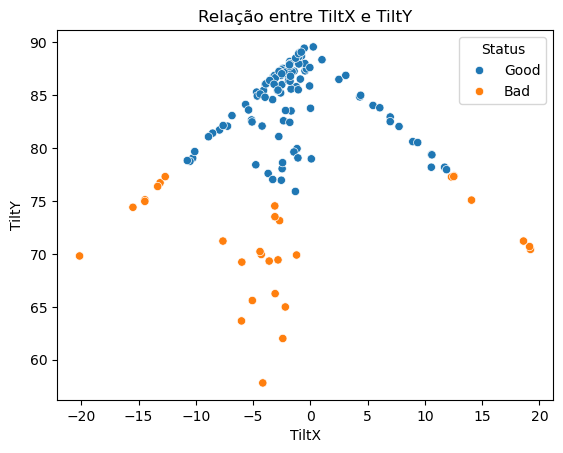

In [144]:
sns.scatterplot(data=df, x="TiltX", y="TiltY", hue="Status")
plt.title("Relação entre TiltX e TiltY")
plt.show()

## Estatística Descritiva

A análise das estatísticas descritivas resume a distribuição dos valores de TiltX e TiltY, calculando média, desvio padrão, mínimo, máximo e quartis. Isso ajuda a entender a variabilidade, tendência central e a presença de outliers nos dados, fornecendo uma visão geral do comportamento das inclinações.

            TiltX       TiltY
count  135.000000  135.000000
mean    -1.495630   81.373407
std      6.537215    6.713311
min    -20.160000   57.810000
25%     -4.025000   77.790000
50%     -2.350000   83.520000
75%     -0.790000   86.765000
max     19.220000   89.570000


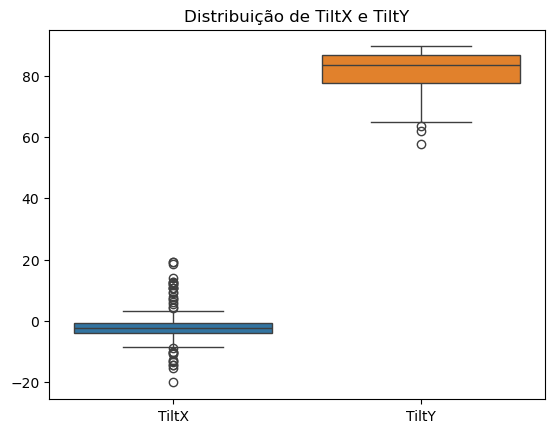

In [148]:
print(df[["TiltX", "TiltY"]].describe())
sns.boxplot(data=df[["TiltX", "TiltY"]])
plt.title("Distribuição de TiltX e TiltY")
plt.show()

## Histogramas de grandezas

Os dados dos sensores foram analisados através de histogramas que mostram a distribuição das grandezas medidas. Cada gráfico, gerado com a biblioteca Matplotlib, apresenta a frequência dos valores, eixos rotulados e grelhas para facilitar a interpretação. O layout foi otimizado para uma visualização clara e organizada.


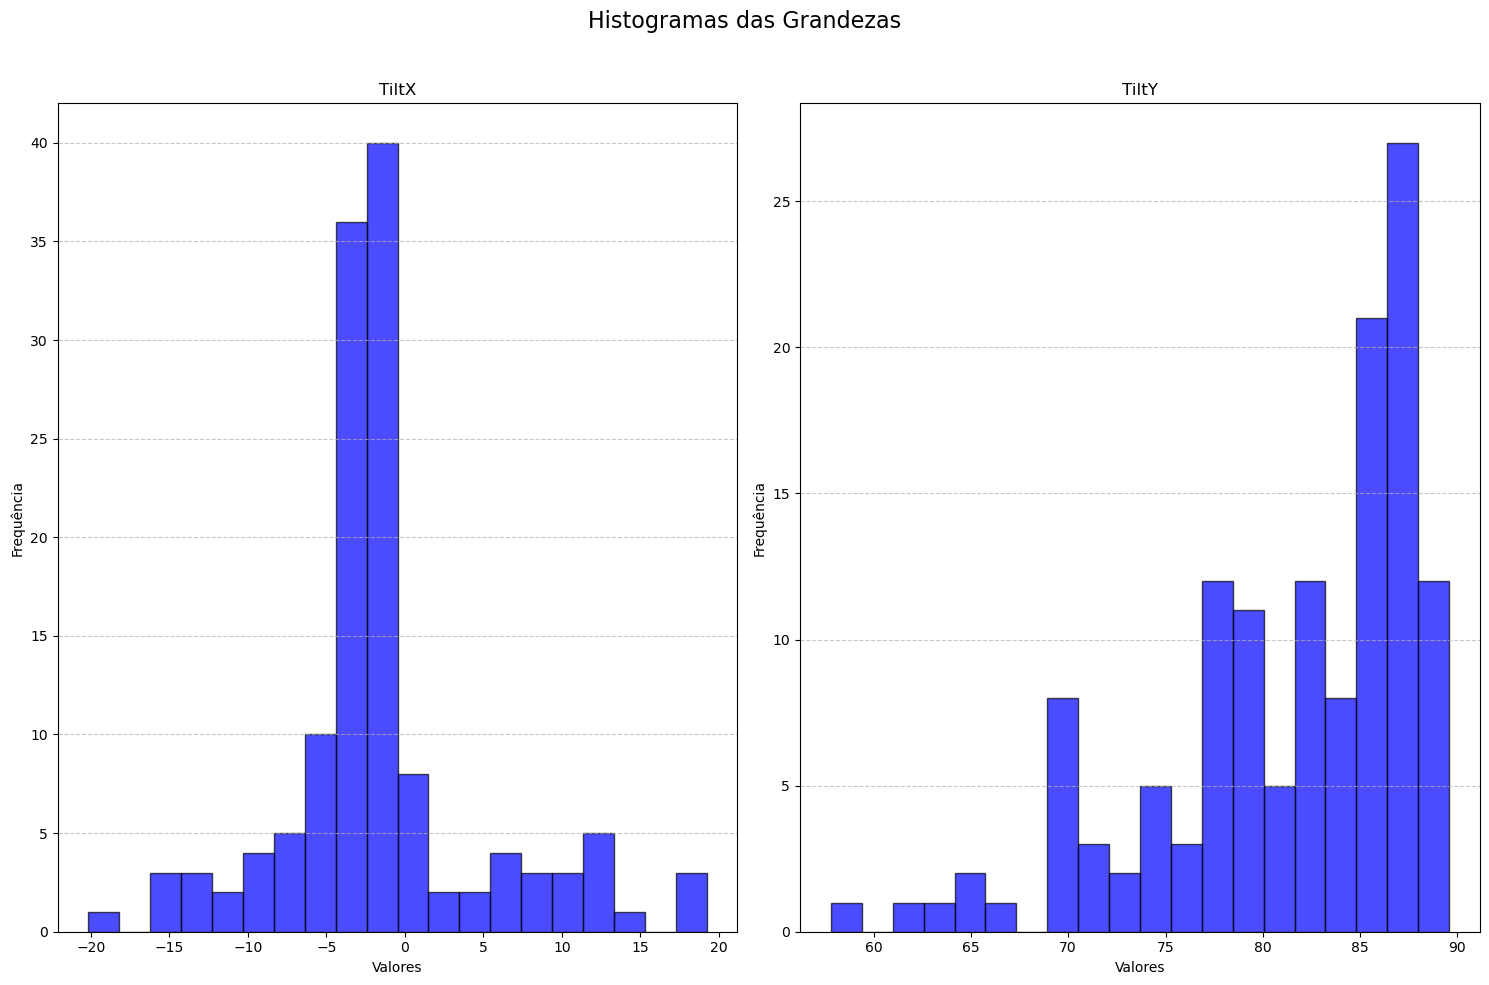

In [177]:
plt.figure(figsize=(15, 10))
plt.suptitle("Histogramas das Grandezas", fontsize=16)

plt.subplot(1, 2, 1)
plt.hist(df['TiltX'], bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('TiltX')
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.hist(df['TiltY'], bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('TiltY')
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Referências

[1] Documentação dos sensores IMU -  https://docs.arduino.cc/tutorials/nano-33-ble-sense-rev2/imu-gyroscope/ 
\
[2] Documentação da biblioteca BMI270_BMM150 - https://docs.arduino.cc/libraries/arduino_bmi270_bmm150/
\
[3] Tutorial de Python - https://www.w3schools.com/python/
\
[4] Recursos académicos sobre o Arduino, Física Aplicada à Computação, IPBeja - https://cms.ipbeja.pt/mod/folder/view.php?id=110848
\
[5] Recursos académicos sobre Python, Física Aplicada à Computação, IPBeja - https://cms.ipbeja.pt/mod/folder/view.php?id=213295